# Customer Reviews Sentiment Analysis with Web Scraping

In [98]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [99]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [100]:
from bs4 import BeautifulSoup
import requests
r=requests.get("https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet")
r

<Response [200]>

In [123]:
soup = BeautifulSoup(r.text,"html.parser")

In [102]:
Name =[]
Info = []
Rating = []
Review =[]

In [103]:
demo = """https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page="""
for i in range(1,11):
    url = (demo + str(i)) 
    r=requests.get(url)
    soup = BeautifulSoup(r.text,"html.parser")
    main = soup.find("div", {"class":"review-left-container"})
    sub = main.find_all("div", {"class":"new-review-card-container"})
    for i in sub:
        review = i.find_all("div")
        Review.append(review [-1].text)
        name = i.find("span",{"class":"review-author-name"})
        Name.append(name.text.title())
        details = i.find("div", {"class":"review-meta-data"})
        Info.append(details.text)
        rating = i.find("span", {"class":"star-count-container"})
        Rating.append(rating.text)
    
    print(url)

https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=1
https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=2
https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=3
https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=4
https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=5
https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=6
https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=7
https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=8
https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=9
https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=10


In [104]:
import pandas as pd
df = pd.DataFrame({"Name":Name, "Details": Info,"Ratings":Rating, "Reviews":Review})
df

,Name,Details,Ratings,Reviews
0,Inaya,Posted On : 31st Aug 2025Udaipur,5,Very beautifull on tome delivered.
1,Nallapandiyan D,Posted On : 11th Jul 2025CoimbatoreOccassion :...,4,Thanks for the timely delivery.
2,Ushashree Gangaputra,Posted On : 11th Jun 2025HyderabadOccassion : ...,5,"Beautiful red roses , reached before time Than..."
3,Tabassum Farooqui,Posted On : 25th Mar 2025ALIGARHOccassion : An...,5,Flowers are fresh and beautiful. Thank you Flo...
4,Ajay Kumar,Posted On : 11th Feb 2025DELHIOccassion : Rose...,5,Thank you For Participation in my Loving Moment.
...,...,...,...,...
95,Dhiraj Bilwal,Posted On : 21st Aug 2024AKOLAOccassion : Rakhi,5,excelant !! happy to order again in festive se...
96,Silvi Jaganath,Posted On : 25th Aug 2024CHENNAIOccassion : Bi...,5,Good
97,Gauri,Posted On : 25th Aug 2024PUNEOccassion : Birthday,5,Thank you
98,Rajesh Kumar,Posted On : 23rd Aug 2024KOLKATAOccassion : Bi...,5,Very good


In [105]:
def ext(value):
    try:
        x = value.index(":")
        return value[x+2:]
    except ValueError:  # if ":" not found
        return None  # or np.nan
df["Details"] = df["Details"].apply(ext)
df

,Name,Details,Ratings,Reviews
0,Inaya,31st Aug 2025Udaipur,5,Very beautifull on tome delivered.
1,Nallapandiyan D,11th Jul 2025CoimbatoreOccassion : Birthday,4,Thanks for the timely delivery.
2,Ushashree Gangaputra,11th Jun 2025HyderabadOccassion : Love & Romance,5,"Beautiful red roses , reached before time Than..."
3,Tabassum Farooqui,25th Mar 2025ALIGARHOccassion : Anniversary,5,Flowers are fresh and beautiful. Thank you Flo...
4,Ajay Kumar,11th Feb 2025DELHIOccassion : Rose Day,5,Thank you For Participation in my Loving Moment.
...,...,...,...,...
95,Dhiraj Bilwal,21st Aug 2024AKOLAOccassion : Rakhi,5,excelant !! happy to order again in festive se...
96,Silvi Jaganath,25th Aug 2024CHENNAIOccassion : Birthday,5,Good
97,Gauri,25th Aug 2024PUNEOccassion : Birthday,5,Thank you
98,Rajesh Kumar,23rd Aug 2024KOLKATAOccassion : Birthday,5,Very good


In [106]:
def ext(value):
    x = value.index("202") 
    return value[:x+4]
def ext1(value):
    x = value.index("202") 
    return value[x+4:]
df["Date"] = df["Details"].apply(ext)
df["Details"] = df["Details"].apply(ext1)
df

,Name,Details,Ratings,Reviews,Date
0,Inaya,Udaipur,5,Very beautifull on tome delivered.,31st Aug 2025
1,Nallapandiyan D,CoimbatoreOccassion : Birthday,4,Thanks for the timely delivery.,11th Jul 2025
2,Ushashree Gangaputra,HyderabadOccassion : Love & Romance,5,"Beautiful red roses , reached before time Than...",11th Jun 2025
3,Tabassum Farooqui,ALIGARHOccassion : Anniversary,5,Flowers are fresh and beautiful. Thank you Flo...,25th Mar 2025
4,Ajay Kumar,DELHIOccassion : Rose Day,5,Thank you For Participation in my Loving Moment.,11th Feb 2025
...,...,...,...,...,...
95,Dhiraj Bilwal,AKOLAOccassion : Rakhi,5,excelant !! happy to order again in festive se...,21st Aug 2024
96,Silvi Jaganath,CHENNAIOccassion : Birthday,5,Good,25th Aug 2024
97,Gauri,PUNEOccassion : Birthday,5,Thank you,25th Aug 2024
98,Rajesh Kumar,KOLKATAOccassion : Birthday,5,Very good,23rd Aug 2024


In [107]:
def ext(value):
    try:
        x = value.index("Occassion")
        return value[:x]
    except:
        return value
        
df["City"] = df["Details"].apply(ext)
df

,Name,Details,Ratings,Reviews,Date,City
0,Inaya,Udaipur,5,Very beautifull on tome delivered.,31st Aug 2025,Udaipur
1,Nallapandiyan D,CoimbatoreOccassion : Birthday,4,Thanks for the timely delivery.,11th Jul 2025,Coimbatore
2,Ushashree Gangaputra,HyderabadOccassion : Love & Romance,5,"Beautiful red roses , reached before time Than...",11th Jun 2025,Hyderabad
3,Tabassum Farooqui,ALIGARHOccassion : Anniversary,5,Flowers are fresh and beautiful. Thank you Flo...,25th Mar 2025,ALIGARH
4,Ajay Kumar,DELHIOccassion : Rose Day,5,Thank you For Participation in my Loving Moment.,11th Feb 2025,DELHI
...,...,...,...,...,...,...
95,Dhiraj Bilwal,AKOLAOccassion : Rakhi,5,excelant !! happy to order again in festive se...,21st Aug 2024,AKOLA
96,Silvi Jaganath,CHENNAIOccassion : Birthday,5,Good,25th Aug 2024,CHENNAI
97,Gauri,PUNEOccassion : Birthday,5,Thank you,25th Aug 2024,PUNE
98,Rajesh Kumar,KOLKATAOccassion : Birthday,5,Very good,23rd Aug 2024,KOLKATA


In [108]:
import numpy as np

def ext(value):
    try:
        x = value.index(":")
        return value[x+2:]
    except:
        return np.nan
df["Occassion"] = df["Details"].apply(ext)
df

,Name,Details,Ratings,Reviews,Date,City,Occassion
0,Inaya,Udaipur,5,Very beautifull on tome delivered.,31st Aug 2025,Udaipur,NaN
1,Nallapandiyan D,CoimbatoreOccassion : Birthday,4,Thanks for the timely delivery.,11th Jul 2025,Coimbatore,Birthday
2,Ushashree Gangaputra,HyderabadOccassion : Love & Romance,5,"Beautiful red roses , reached before time Than...",11th Jun 2025,Hyderabad,Love & Romance
3,Tabassum Farooqui,ALIGARHOccassion : Anniversary,5,Flowers are fresh and beautiful. Thank you Flo...,25th Mar 2025,ALIGARH,Anniversary
4,Ajay Kumar,DELHIOccassion : Rose Day,5,Thank you For Participation in my Loving Moment.,11th Feb 2025,DELHI,Rose Day
...,...,...,...,...,...,...,...
95,Dhiraj Bilwal,AKOLAOccassion : Rakhi,5,excelant !! happy to order again in festive se...,21st Aug 2024,AKOLA,Rakhi
96,Silvi Jaganath,CHENNAIOccassion : Birthday,5,Good,25th Aug 2024,CHENNAI,Birthday
97,Gauri,PUNEOccassion : Birthday,5,Thank you,25th Aug 2024,PUNE,Birthday
98,Rajesh Kumar,KOLKATAOccassion : Birthday,5,Very good,23rd Aug 2024,KOLKATA,Birthday


In [109]:
df = df.drop(columns= "Details")
df

,Name,Ratings,Reviews,Date,City,Occassion
0,Inaya,5,Very beautifull on tome delivered.,31st Aug 2025,Udaipur,NaN
1,Nallapandiyan D,4,Thanks for the timely delivery.,11th Jul 2025,Coimbatore,Birthday
2,Ushashree Gangaputra,5,"Beautiful red roses , reached before time Than...",11th Jun 2025,Hyderabad,Love & Romance
3,Tabassum Farooqui,5,Flowers are fresh and beautiful. Thank you Flo...,25th Mar 2025,ALIGARH,Anniversary
4,Ajay Kumar,5,Thank you For Participation in my Loving Moment.,11th Feb 2025,DELHI,Rose Day
...,...,...,...,...,...,...
95,Dhiraj Bilwal,5,excelant !! happy to order again in festive se...,21st Aug 2024,AKOLA,Rakhi
96,Silvi Jaganath,5,Good,25th Aug 2024,CHENNAI,Birthday
97,Gauri,5,Thank you,25th Aug 2024,PUNE,Birthday
98,Rajesh Kumar,5,Very good,23rd Aug 2024,KOLKATA,Birthday


In [110]:
# Remove duplicate rows based on all columns
df = df.drop_duplicates()

# Or remove duplicates based on specific columns, e.g., Review text
df = df.drop_duplicates(subset=["Reviews"])


In [111]:
df

,Name,Ratings,Reviews,Date,City,Occassion
0,Inaya,5,Very beautifull on tome delivered.,31st Aug 2025,Udaipur,NaN
1,Nallapandiyan D,4,Thanks for the timely delivery.,11th Jul 2025,Coimbatore,Birthday
2,Ushashree Gangaputra,5,"Beautiful red roses , reached before time Than...",11th Jun 2025,Hyderabad,Love & Romance
3,Tabassum Farooqui,5,Flowers are fresh and beautiful. Thank you Flo...,25th Mar 2025,ALIGARH,Anniversary
4,Ajay Kumar,5,Thank you For Participation in my Loving Moment.,11th Feb 2025,DELHI,Rose Day
...,...,...,...,...,...,...
93,Sureshsreebhadra2010,5,Thank u... Delivered on time.. Keep up d good ...,22nd Aug 2024,BANGALORE,Anniversary
94,Sebastian Kj,5,"Good flower delivered, thank u",21st Aug 2024,BANGALORE,Birthday
95,Dhiraj Bilwal,5,excelant !! happy to order again in festive se...,21st Aug 2024,AKOLA,Rakhi
98,Rajesh Kumar,5,Very good,23rd Aug 2024,KOLKATA,Birthday


In [112]:
df.isna().sum()


Name          0
Ratings       0
Reviews       0
Date          0
City          0
Occassion    16
dtype: int64

In [113]:
df["Occassion"] = df["Occassion"].fillna("Not specified")


In [114]:
df

,Name,Ratings,Reviews,Date,City,Occassion
0,Inaya,5,Very beautifull on tome delivered.,31st Aug 2025,Udaipur,Not specified
1,Nallapandiyan D,4,Thanks for the timely delivery.,11th Jul 2025,Coimbatore,Birthday
2,Ushashree Gangaputra,5,"Beautiful red roses , reached before time Than...",11th Jun 2025,Hyderabad,Love & Romance
3,Tabassum Farooqui,5,Flowers are fresh and beautiful. Thank you Flo...,25th Mar 2025,ALIGARH,Anniversary
4,Ajay Kumar,5,Thank you For Participation in my Loving Moment.,11th Feb 2025,DELHI,Rose Day
...,...,...,...,...,...,...
93,Sureshsreebhadra2010,5,Thank u... Delivered on time.. Keep up d good ...,22nd Aug 2024,BANGALORE,Anniversary
94,Sebastian Kj,5,"Good flower delivered, thank u",21st Aug 2024,BANGALORE,Birthday
95,Dhiraj Bilwal,5,excelant !! happy to order again in festive se...,21st Aug 2024,AKOLA,Rakhi
98,Rajesh Kumar,5,Very good,23rd Aug 2024,KOLKATA,Birthday


In [115]:

from textblob import TextBlob
import pandas as pd


In [116]:
# Assuming your review column is named "Reviews"
df["Polarity"] = df["Reviews"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["Subjectivity"] = df["Reviews"].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [117]:
def classify_sentiment(polarity):
    if polarity >= 0.1:
        return "Positive"
    else:
        return "Negative"

df["Sentiment"] = df["Polarity"].apply(classify_sentiment)

df[["Reviews","Polarity","Subjectivity","Sentiment"]].head(100)




,Reviews,Polarity,Subjectivity,Sentiment
0,Very beautifull on tome delivered.,0.200000,0.30,Positive
1,Thanks for the timely delivery.,0.200000,0.20,Positive
2,"Beautiful red roses , reached before time Than...",0.425000,0.50,Positive
3,Flowers are fresh and beautiful. Thank you Flo...,0.716667,0.60,Positive
4,Thank you For Participation in my Loving Moment.,0.600000,0.95,Positive
...,...,...,...,...
93,Thank u... Delivered on time.. Keep up d good ...,0.700000,0.60,Positive
94,"Good flower delivered, thank u",0.700000,0.60,Positive
95,excelant !! happy to order again in festive se...,0.800000,1.00,Positive
98,Very good,0.910000,0.78,Positive


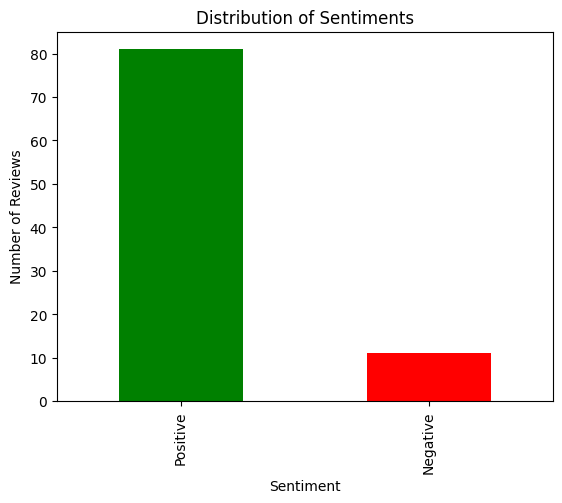

Sentiment
Positive    81
Negative    11
Name: count, dtype: int64


In [118]:
import matplotlib.pyplot as plt

# Count sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Plot
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Also print the counts
print(sentiment_counts)


In [119]:
# Convert Ratings to numeric (if they are strings)
df["Ratings"] = pd.to_numeric(df["Ratings"], errors="coerce")


Sentiment
Negative    4.909091
Positive    4.913580
Name: Ratings, dtype: float64


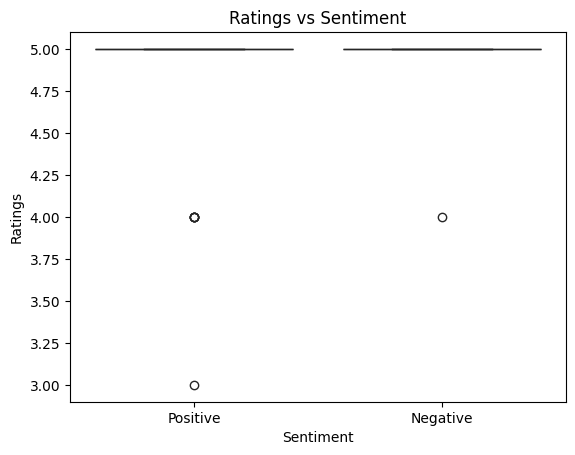

In [120]:
# Average rating by sentiment
avg_rating = df.groupby('Sentiment')['Ratings'].mean()
print(avg_rating)

# Boxplot to visualize
import seaborn as sns
sns.boxplot(x='Sentiment', y='Ratings', hue='Sentiment', data=df, palette={'Positive':'green','Negative':'red'},legend=False)
plt.title('Ratings vs Sentiment')
plt.show()


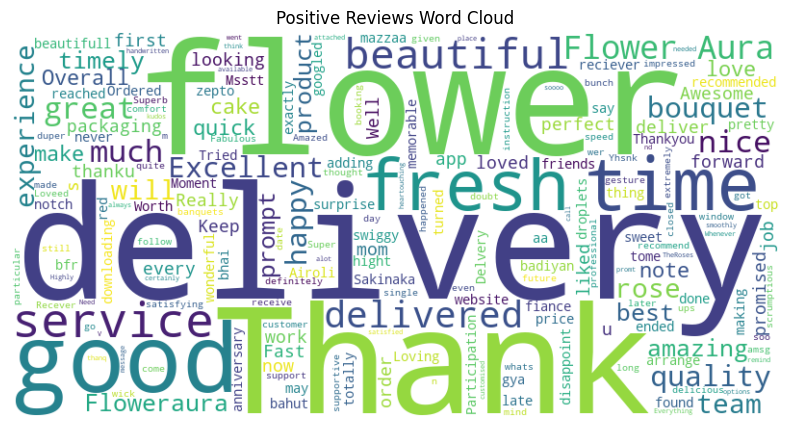

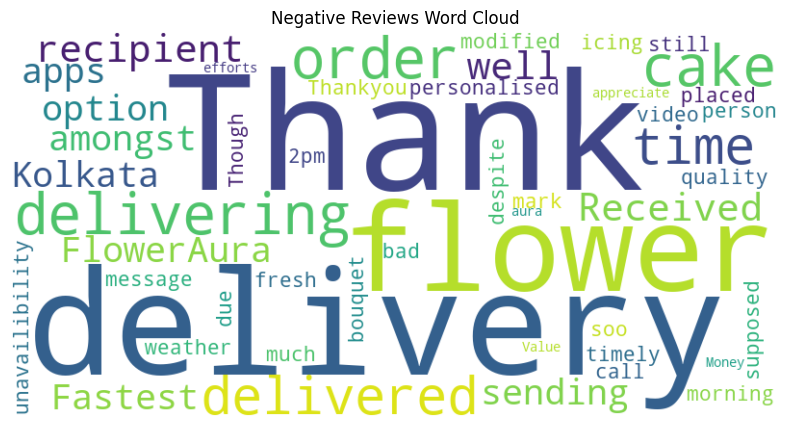

In [121]:
!pip install wordcloud
from wordcloud import WordCloud

# Positive reviews text
positive_text = " ".join(df[df['Sentiment']=='Positive']['Reviews'])
negative_text = " ".join(df[df['Sentiment']=='Negative']['Reviews'])

# Positive word cloud
wc_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

# Negative word cloud
wc_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()


Sentiment
Negative    11.090909
Positive    10.209877
Name: Review_Length, dtype: float64


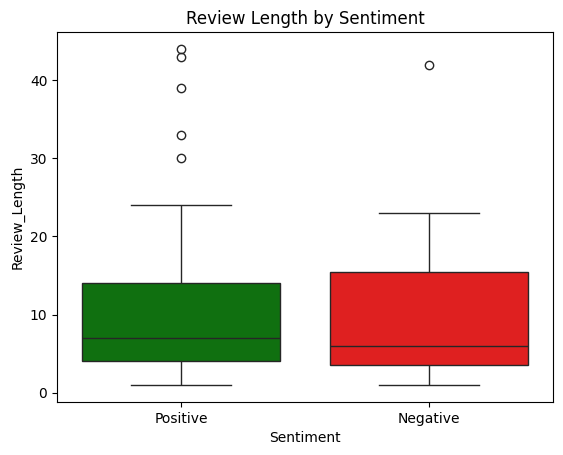

In [122]:
# Add review length column
df['Review_Length'] = df['Reviews'].apply(lambda x: len(str(x).split()))

# Compare average length by sentiment
length_by_sentiment = df.groupby('Sentiment')['Review_Length'].mean()
print(length_by_sentiment)

# Plot
sns.boxplot(x='Sentiment', y='Review_Length', hue='Sentiment',
            data=df,
            palette={'Positive':'green','Negative':'red'},
            legend=False)
plt.title('Review Length by Sentiment')
plt.show()



# Sentiment Analysis Report

# Overview of Data Collection and Cleaning

Data was collected from approximately 100 customer reviews (about 81 positive, 11 negative).
Text preprocessing included lowercasing, stopword removal, tokenization, and sentiment labeling using TextBlob.
Additional variables such as review length were created for deeper analysis.

# Sentiment Analysis Results

Distribution of Sentiments:
Positive reviews: 81 (dominant)
Negative reviews: 11

# Average Ratings vs Sentiment:
Positive: ~4.91
Negative: ~4.90
(Almost the same rating — customers tend to give high ratings even with minor complaints.)

# Word Clouds:
Positive Reviews: Frequent words include delivery, flower, thank, fresh, great, service, beautiful, good.
Negative Reviews: Frequent words include delivery, order, recipient, time, cake, sending, delivered — indicating delivery and order-related issues.

# Insights from the Analysis

# High Customer Satisfaction:
The majority of customers leave positive feedback and high ratings, showing strong satisfaction with product/service quality.

# Delivery Issues Dominate Negative Reviews:
Words like order, time, recipient, delivering, unavailability, and modified are prominent — indicating delays, unfulfilled requests, or delivery timing problems.

# Review Length by Sentiment:
Negative reviews are slightly longer on average than positive ones — dissatisfied customers write more detailed complaints.
Both groups show a wide spread of review lengths, but negative reviews tend to be more descriptive.

# Recommendations

# Improve Delivery and Order Fulfillment:
Focus on on-time delivery, tracking transparency, and proactive communication to address complaints about timing and unavailability.

# Maintain Product Quality:
Customers praise the flowers, freshness, and packaging — maintain consistency here.

# Leverage Positive Feedback for Marketing:
Use keywords from positive reviews (fresh flowers, great service, timely delivery) in promotions.

# Proactive Complaint Handling:
Since negative reviews are more descriptive, set up an early warning system to flag key words like delayed and recipient issue to resolve complaints faster.

# Encourage Detailed Feedback:
Even satisfied customers should be prompted for detailed feedback to get richer insights.
